# Buoy Data
## Historical Buoy Data 
    - MEDS103: Historical buoy data from 1970-1988, data collected from waverider buoys close to Tofino. Locations were changed periodically(see reference). 
    - Station 46206: Laperouse bank buoy data from 1988-2022, located 25 km away from MEDS buoy. 
    
    http://www.waveworkshop.org/11thWaves/Papers/ThomasSwail_LongTermCoastalWaves2009.pdf

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfmeds=pd.read_csv('meds103.csv')

In [15]:
dfmeds.tail()

,STN_ID,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,Unnamed: 8
224162,MEDS103,06/16/1998 20:50,1,49.03,125.8,40.0,0.59,11.11,NaN
224163,MEDS103,06/16/1998 23:50,1,49.03,125.8,40.0,0.59,16.67,NaN
224164,MEDS103,06/17/1998 02:50,1,49.03,125.8,40.0,0.58,16.67,NaN
224165,MEDS103,06/17/1998 05:50,1,49.03,125.8,40.0,0.47,15.38,NaN
224166,MEDS103,06/17/1998 08:50,1,49.03,125.8,40.0,0.42,16.67,NaN


**Description of Wave characteristics**
- VCAR
  Characteristic significant wave height (calculated by MEDS) (m)
- VTPK
  Wave spectrum peak period (calculated by MEDS) (s)
https://meds-sdmm.dfo-mpo.gc.ca/isdm-gdsi/waves-vagues/formats-eng.html#FormatB



In [13]:
dfmeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224167 entries, 0 to 224166
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STN_ID      224167 non-null  object 
 1   DATE        224167 non-null  object 
 2   Q_FLAG      224167 non-null  int64  
 3   LATITUDE    224167 non-null  float64
 4   LONGITUDE   224167 non-null  float64
 5   DEPTH       224167 non-null  float64
 6   VCAR        224167 non-null  float64
 7   VTPK        224167 non-null  float64
 8   Unnamed: 8  0 non-null       float64
dtypes: float64(6), int64(1), object(2)
memory usage: 15.4+ MB


In [4]:
dfmeds[['VCAR','VTPK']].describe()

,VCAR,VTPK
count,224167.000000,224167.000000
mean,1.953182,11.765320
std,1.100524,3.988032
min,0.000000,2.000000
25%,1.160000,9.090000
50%,1.680000,11.110000
75%,2.490000,14.290000
max,38.570000,28.570000


In [7]:

df=pd.read_csv('buoy_data/c46206.csv')

## Data Dictionary
- VCAR: Characteristic significant wave height (calculated by MEDS) (m)
- VTPK: Wave spectrum peak period (calculated by MEDS) (s)
- VWH\$: Characteristic significant wave height (reported by the buoy) (m)
- VCMX: Maximum zero crossing wave height (reported by the buoy) (m)
- VTP\$: Wave spectrum peak period (reported by the buoy) (s)
- WDIR: Direction from which the wind is blowing (° True)
- WSPD: Horizontal wind speed (m/s)
- WSS\$:Horizontal scalar wind speed (m/s)
- GSPD: Gust wind speed (m/s)
- ATMS: Atmospheric pressure at sea level (mbar)
- DRYT: Dry bulb temperature (air temperature) (°C)
- SSTP: Sea surface temperature (°C)
- Q_FLAG: 0
    - Blank - No quality control (QC) has been performed
    - 1- Good - QC has been performed: record appears correct
    - 3-Doubtful - QC has been performed: record appears doubtful
    - 4-Erroneous - QC has been performed: record appears erroneous
    - 5-Changes - The record has been changed as a result of QC
    - 6-Acceptable - QC has been performed: record seems inconsistent with other records
    - 7-Off Position - There is a problem with the buoy position or mooring. Data may still be useful.
    - 8-Reserved
    - 9-Reserved - indicates missing elements



In [18]:
df.tail()

,STN_ID,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,VWH$,VCMX,...,GSPD,WDIR.1,WSPD.1,WSS$.1,GSPD.1,ATMS,ATMS.1,DRYT,SSTP,Unnamed: 23
237877,C46206,04/13/2022 21:38,0,48.83,126.0,72.0,10000.0,10000.0,0.1,1.4,...,0.1,0.0,0.0,NaN,0.0,1016.0,1016.0,11.1,13.4,NaN
237878,C46206,04/13/2022 22:38,0,48.83,126.0,72.0,10000.0,10000.0,0.0,0.2,...,0.1,0.0,0.0,NaN,0.0,1015.6,1015.6,12.1,14.4,NaN
237879,C46206,04/13/2022 23:38,0,48.83,126.0,72.0,10000.0,10000.0,0.0,0.3,...,0.1,0.0,0.0,NaN,0.0,1015.3,1015.3,12.5,14.9,NaN
237880,C46206,04/15/2022 23:38,0,48.83,126.0,72.0,10000.0,10000.0,0.0,0.2,...,0.0,0.0,0.0,NaN,0.0,1017.6,1017.6,10.5,14.2,NaN
237881,C46206,04/17/2022 23:38,0,48.83,126.0,72.0,10000.0,10000.0,0.0,0.1,...,1.2,0.0,0.0,NaN,0.0,1019.3,1019.3,12.0,14.2,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237882 entries, 0 to 237881
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STN_ID       237882 non-null  object 
 1   DATE         237882 non-null  object 
 2   Q_FLAG       237882 non-null  int64  
 3   LATITUDE     237882 non-null  float64
 4   LONGITUDE    237882 non-null  float64
 5   DEPTH        237882 non-null  float64
 6   VCAR         237882 non-null  float64
 7   VTPK         237882 non-null  float64
 8   VWH$         220464 non-null  float64
 9   VCMX         237882 non-null  float64
 10  VTP$         215311 non-null  float64
 11  WDIR         237882 non-null  float64
 12  WSPD         237882 non-null  float64
 13  WSS$         28237 non-null   float64
 14  GSPD         237882 non-null  float64
 15  WDIR.1       237882 non-null  float64
 16  WSPD.1       237882 non-null  float64
 17  WSS$.1       28237 non-null   float64
 18  GSPD.1       237882 non-

### Deal with nulls and incorrect data

In [20]:
df[['VTPK','VCAR']].describe() #max wave height is indicated at 10,000m this does not seem correct

,VTPK,VCAR
count,237882.000000,237882.000000
mean,718.423131,710.755579
std,2562.358205,2572.008777
min,0.000000,0.000000
25%,9.100000,1.370000
50%,11.130000,2.080000
75%,13.470000,3.140000
max,10000.000000,95540.550000


In [ ]:
plt.subplot(2, 1, 1)
plt.hist(df['column1'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of column1')
plt.xlabel('Values')
plt.ylabel('Frequency')


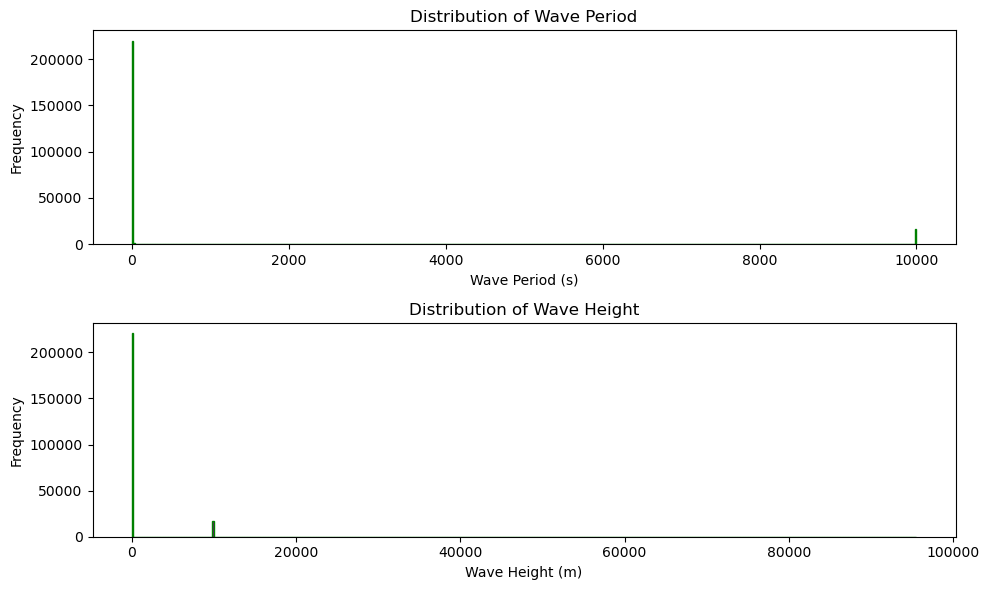

In [29]:
#Look at distribution of VTPK and VCAR 
num_bins = int(np.sqrt(len(df['VCAR'])))
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.hist(df['VTPK'], bins=num_bins, color ='blue', edgecolor ='green')
plt.title('Distribution of Wave Period')
plt.xlabel('Wave Period (s)')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.hist(df['VCAR'], bins =num_bins, color= 'purple', edgecolor= 'green')
plt.title('Distribution of Wave Height')
plt.xlabel('Wave Height (m)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are clear outliers in wave height and wave period. 

In [33]:
val_over10000= (df['VTPK']>= 10000)
count_over_10000=val_over10000.sum()
print('count of occurences, wave period over 10,000 seconds:',count_over_10000)

count of occurences, wave period over 10,000 seconds: 16846


In [34]:
val_over90000= (df['VCAR']>= 90000)
count_over_90000=val_over90000.sum()
print('count of occurences, wave height over 90,000 meters:',count_over_90000)

count of occurences, wave height over 90,000 meters: 1


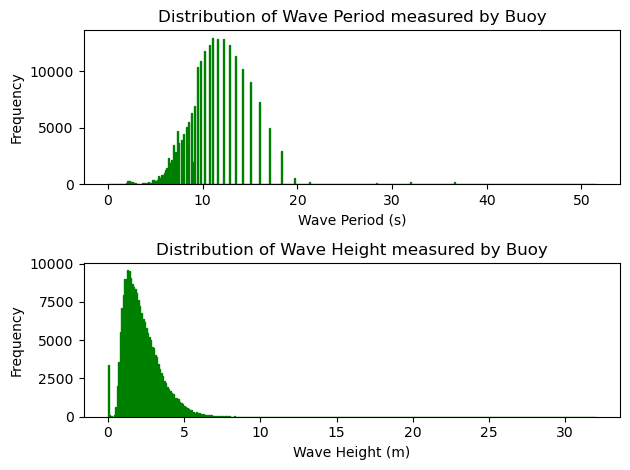

In [36]:
#plot distribution of VTP$ and VWH$: figure out wether to use VTP$/VWH$ or VTPK/VCAR 

plt.subplot(2,1,1)
plt.hist(df['VTP$'], bins=num_bins, color ='blue', edgecolor ='green')
plt.title('Distribution of Wave Period measured by Buoy')
plt.xlabel('Wave Period (s)')
plt.ylabel('Frequency')

plt.subplot(2,1,2)
plt.hist(df['VWH$'], bins =num_bins, color= 'purple', edgecolor= 'green')
plt.title('Distribution of Wave Height measured by Buoy')
plt.xlabel('Wave Height (m)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Deal with Null values**

In [26]:
df.isnull().sum()

STN_ID              0
DATE                0
Q_FLAG              0
LATITUDE            0
LONGITUDE           0
DEPTH               0
VCAR                0
VTPK                0
VWH$            17418
VCMX                0
VTP$            22571
WDIR                0
WSPD                0
WSS$           209645
GSPD                0
WDIR.1              0
WSPD.1              0
WSS$.1         209645
GSPD.1              0
ATMS                5
ATMS.1           5297
DRYT                0
SSTP                0
Unnamed: 23    237882
dtype: int64

In [23]:
#VWH$ significant wave height (m) measured by buoy. 
df['VWH$'].isnull().sum()

17418

In [24]:
rows_withnull = df[df['VWH$'].isnull()]
rows_withnull.head()
#decide what to do with VCAR and if to just use VCAR and drop VWH$ or impute values from VCAR.

,STN_ID,DATE,Q_FLAG,LATITUDE,LONGITUDE,DEPTH,VCAR,VTPK,VWH$,VCMX,...,GSPD,WDIR.1,WSPD.1,WSS$.1,GSPD.1,ATMS,ATMS.1,DRYT,SSTP,Unnamed: 23
0,C46206,11/22/1988 22:34,1,48.83,126.0,73.0,5.42,11.64,NaN,8.4,...,15.6,225.0,11.1,NaN,14.6,983.9,NaN,9.2,10.9,NaN
1,C46206,11/23/1988 00:33,1,48.83,126.0,73.0,5.89,14.22,NaN,9.0,...,13.2,252.0,10.2,NaN,12.8,986.2,NaN,8.8,10.4,NaN
2,C46206,11/23/1988 01:34,1,48.83,126.0,73.0,6.49,12.80,NaN,10.5,...,13.7,268.0,10.6,NaN,13.5,987.5,NaN,8.0,10.5,NaN
3,C46206,11/23/1988 02:34,1,48.83,126.0,73.0,7.34,15.06,NaN,12.1,...,15.5,265.0,11.3,NaN,15.7,988.3,NaN,8.4,10.5,NaN
4,C46206,11/23/1988 04:34,1,48.83,126.0,73.0,7.71,14.22,NaN,13.0,...,14.3,285.0,10.3,NaN,13.6,991.0,NaN,8.0,10.5,NaN
